# Appliances Energy Prediction

**The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).**

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional


In [1]:
#!pip install pmdarima

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm




import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('energydata_complete.csv')

## EDA - Exploratory Data Analysis

- It is the process of understanding, exploring, and visualizing data. In this process, we will clean the data, characterize and perform statistical analysis, visualize the data and interpret the results.

In [4]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
df.shape

(19735, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## Visualization

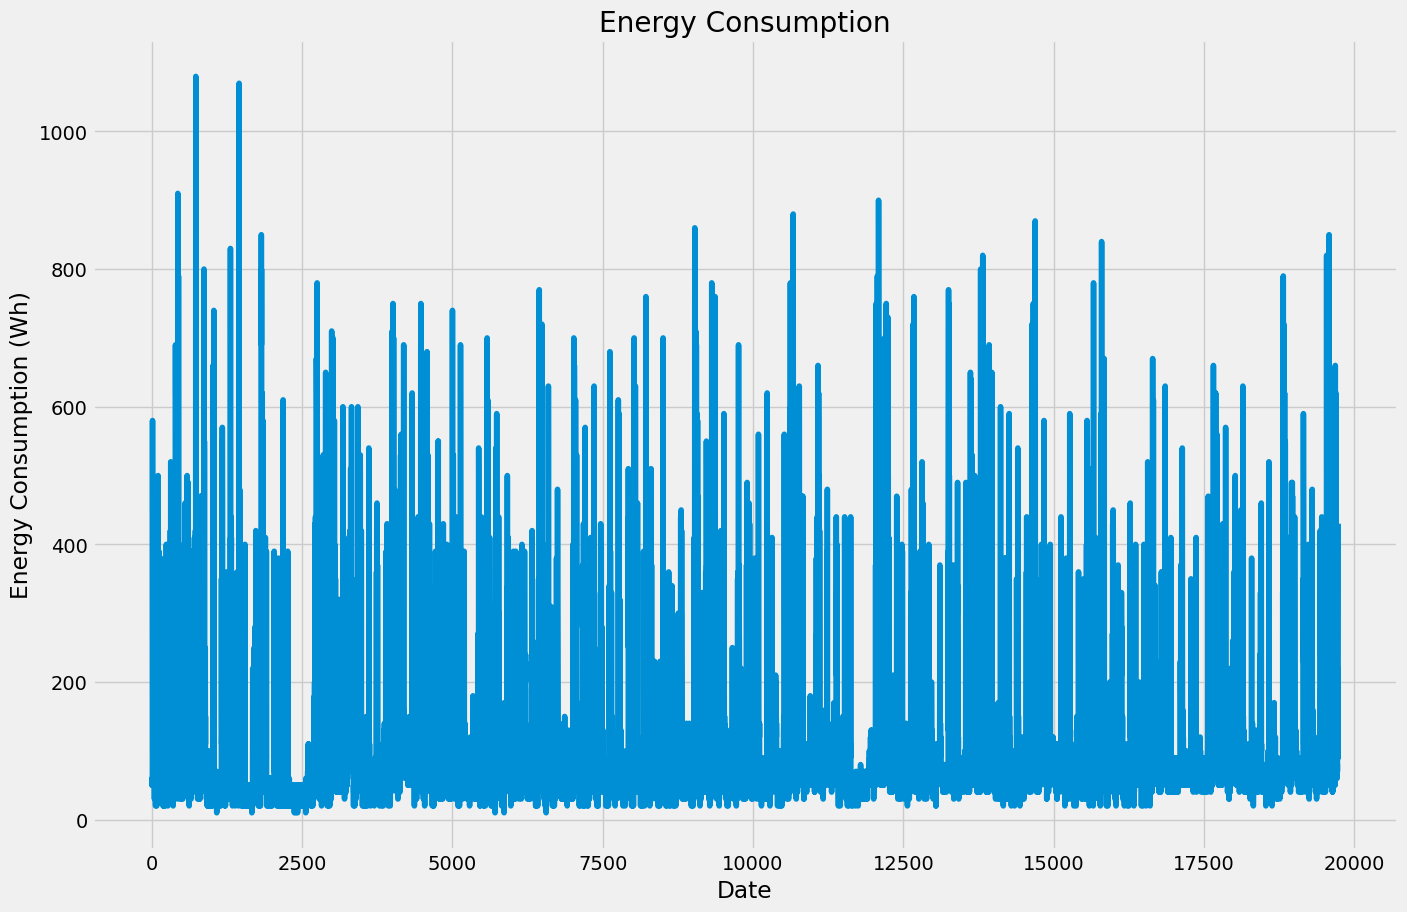

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
sns.lineplot(x=df.index, y='Appliances', data=df)
plt.title('Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.show()


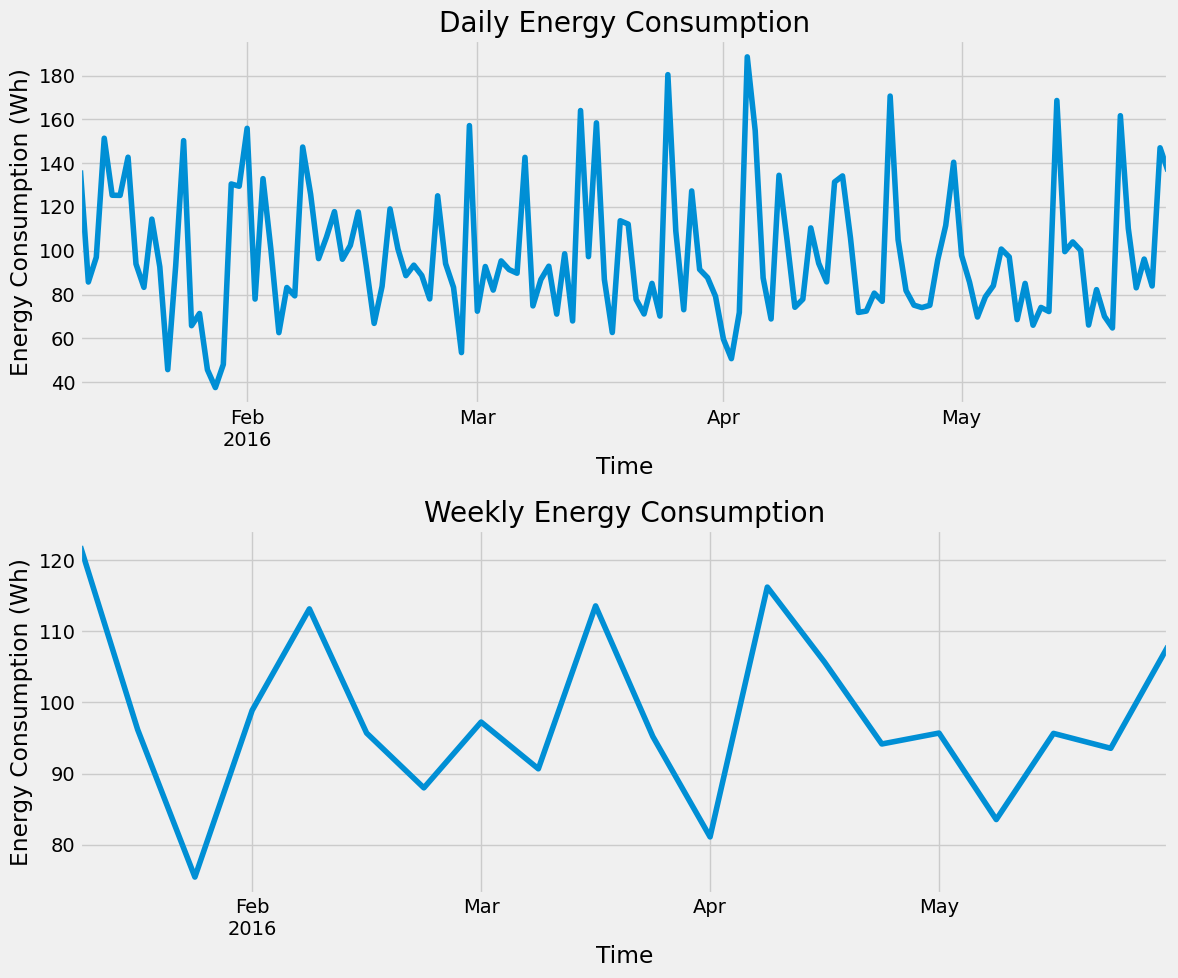

In [9]:
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
# Daily energy consumption
daily_energy = df['Appliances'].resample('D').mean()

# weekly energy consumption
weekly_energy = df['Appliances'].resample('W').mean()


plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

daily_energy.plot(ax=axes[0])
axes[0].set_title('Daily Energy Consumption')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Energy Consumption (Wh)')

weekly_energy.plot(ax=axes[1])
axes[1].set_title('Weekly Energy Consumption')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Energy Consumption (Wh)')

plt.tight_layout()
plt.show()


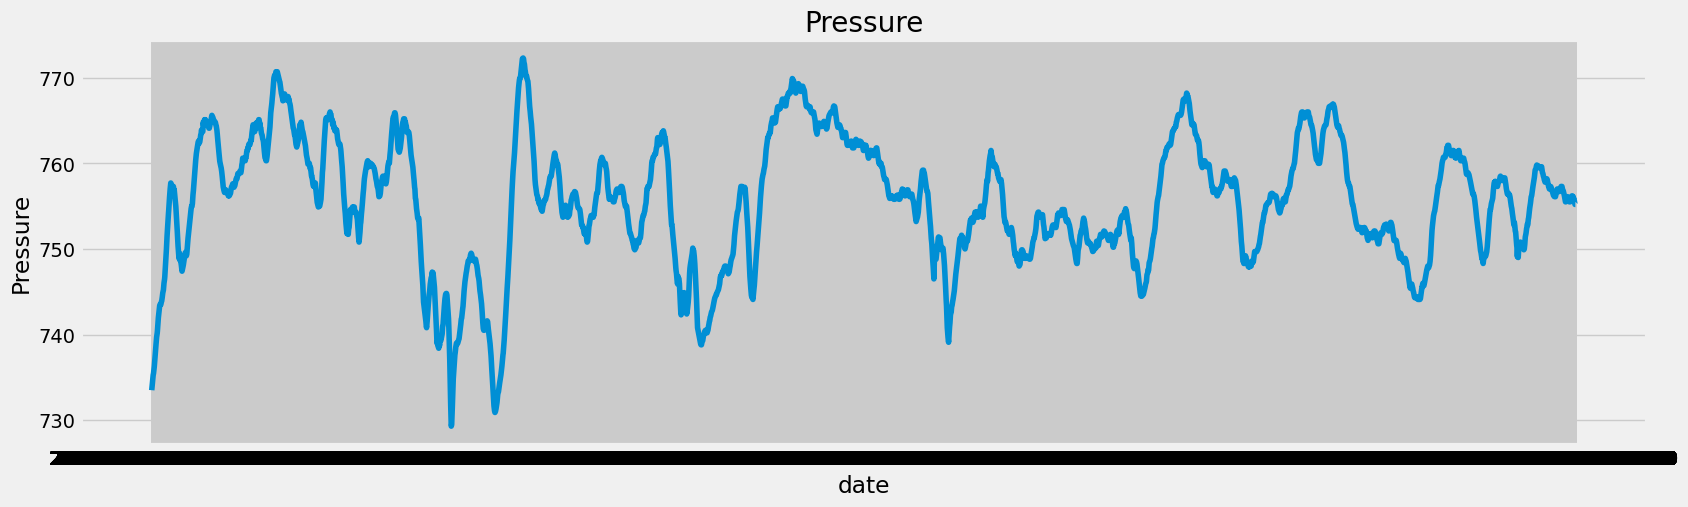

In [17]:
date = df["date"]
Pressure = df["Press_mm_hg"]
plt.figure(figsize=(18, 5))
plt.plot(date, Pressure, label="low")
plt.title("Pressure")
plt.xlabel("date")
plt.ylabel("Pressure")
plt.show()

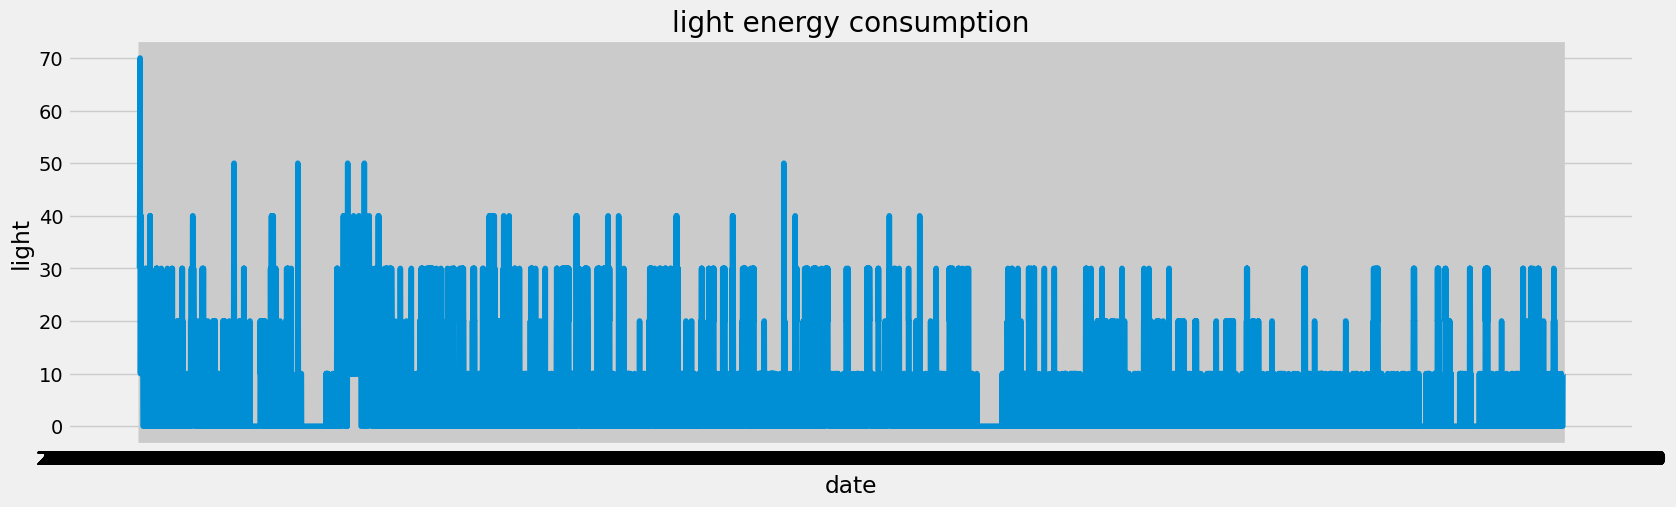

In [18]:
date = df["date"]
light = df["lights"]
plt.figure(figsize=(18, 5))
plt.plot(date,light, label="low")
plt.title("light energy consumption")
plt.xlabel("date")
plt.ylabel("light")
plt.show()

<Figure size 1500x1000 with 0 Axes>

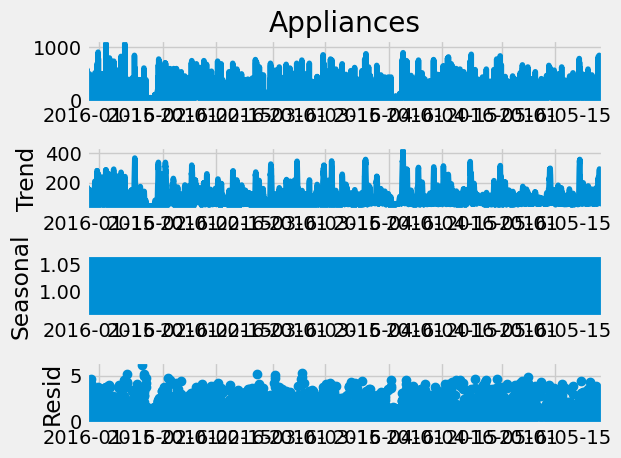

In [10]:
result = seasonal_decompose(df["Appliances"], model='multiplicative', period=30)
fig = plt.figure(figsize=(15, 10))
result.plot()
plt.show()

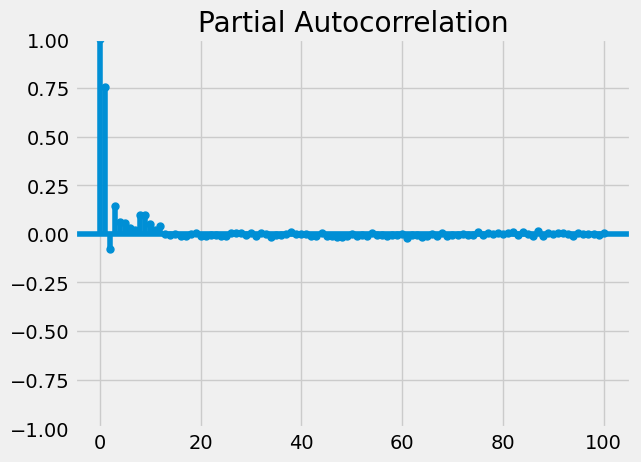

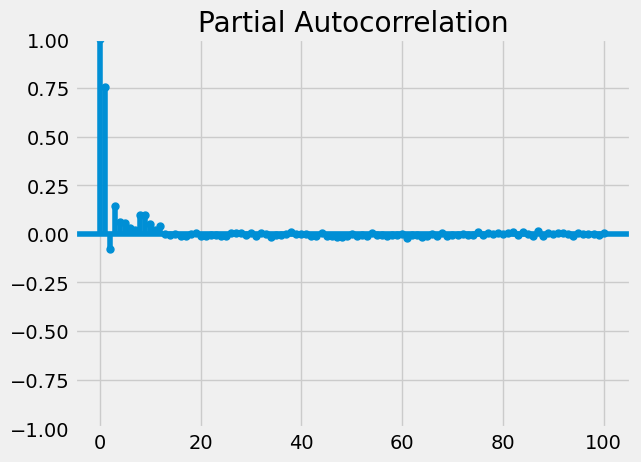

In [11]:
plot_pacf(df["Appliances"], lags = 100)

## Modelling

In [13]:
p, d, q = 5, 1, 2
model = sm.tsa.SARIMAX(df["Appliances"], order=(p, d, q))
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Appliances   No. Observations:                19735
Model:               SARIMAX(5, 1, 2)   Log Likelihood             -110818.314
Date:                Wed, 05 Apr 2023   AIC                         221652.629
Time:                        23:47:33   BIC                         221715.749
Sample:                    01-11-2016   HQIC                        221673.293
                         - 05-27-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1665      0.076     -2.184      0.029      -0.316      -0.017
ar.L2          0.4483      0.056      7.976      0.000       0.338       0.558
ar.L3         -0.1153      0.016     -7.190      0.000      -0.147      -0.084
ar.L4          0.0638      0.007      9.462      0.000       0.051       0.077
ar.L5         -0.0091      0.006     -1.486      0.137      -0.021       0.003
ma.L1         -0.0208      0.076     -0.273      0.785      -0.170       0.129
ma.L2         -0.8192      0.071    -11.613      0.000      -0.957      -0.681
sigma2      4378.5727     13.422    326.228      0.000    4352.266    4404.879
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            407714.60
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             2.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
guess = fitted.predict()
guess

2016-01-11 17:00:00      0.000000
2016-01-11 17:10:00     59.982613
2016-01-11 17:20:00     59.922888
2016-01-11 17:30:00     50.669892
2016-01-11 17:40:00     52.588502
                          ...    
2016-05-27 17:20:00    101.598562
2016-05-27 17:30:00    113.793163
2016-05-27 17:40:00    100.167989
2016-05-27 17:50:00    249.164139
2016-05-27 18:00:00    335.014662
Freq: 10T, Name: predicted_mean, Length: 19735, dtype: float64

## Prediction

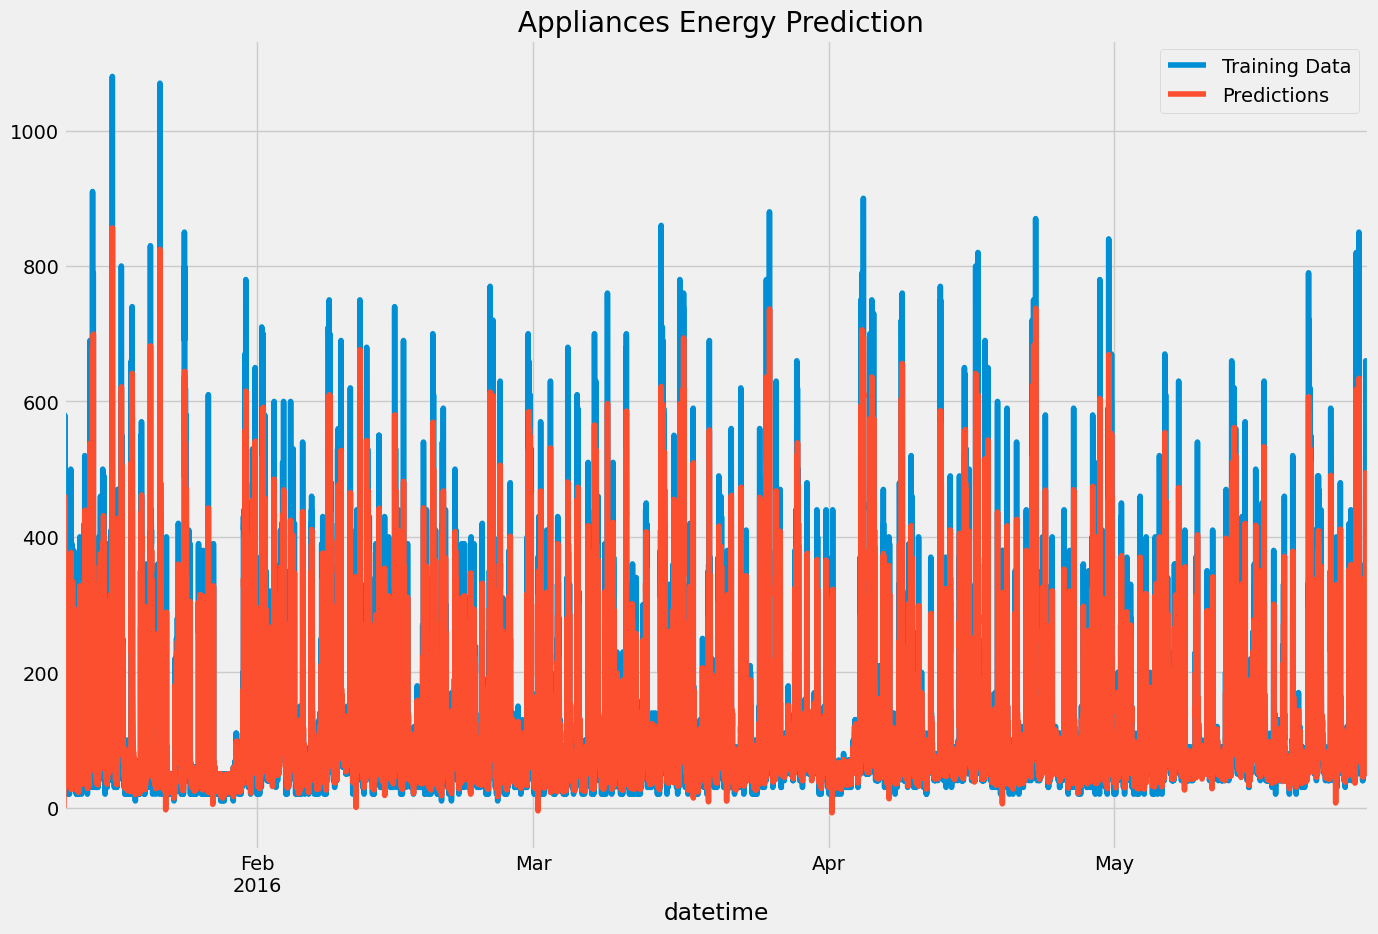

In [15]:
plt.style.use('fivethirtyeight')

df["Appliances"].plot(legend=True, label="Training Data", figsize=(15, 10))
guess.plot(legend=True, label="Predictions")
plt.title(" Appliances Energy Prediction")
plt.savefig("A,appliances_energy_prediction.png", format="png")

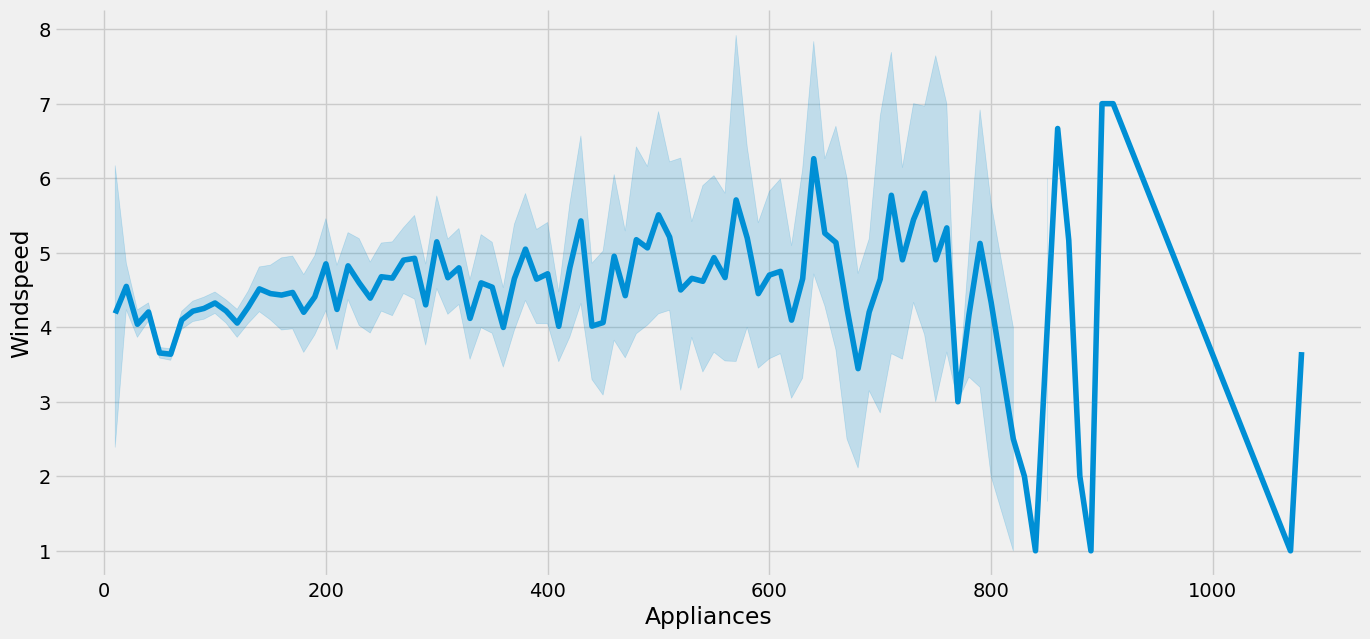

In [19]:
fig,ax = plt.subplots(figsize=(15,7))

chart=sns.lineplot(x='Appliances', y='Windspeed', data= df)
sns.despine(left=True)

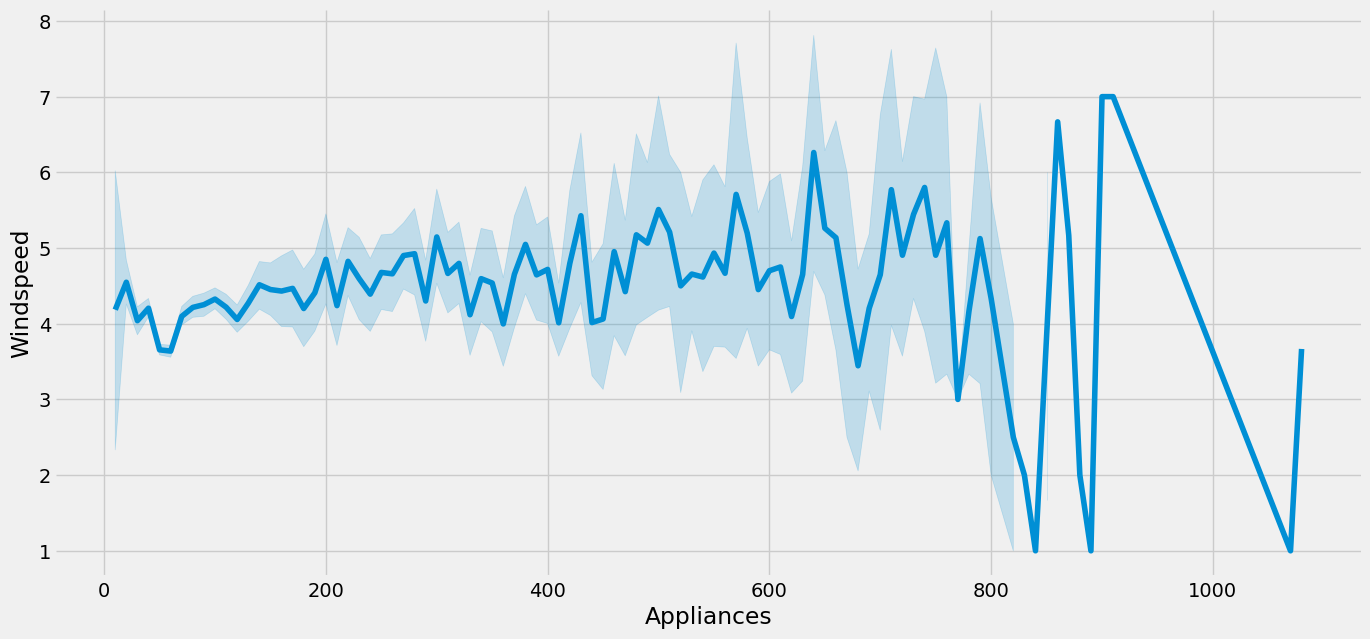

In [20]:
fig,ax = plt.subplots(figsize=(15,7))

chart=sns.lineplot(x='Appliances', y='Windspeed', data= df)
sns.despine(left=True)

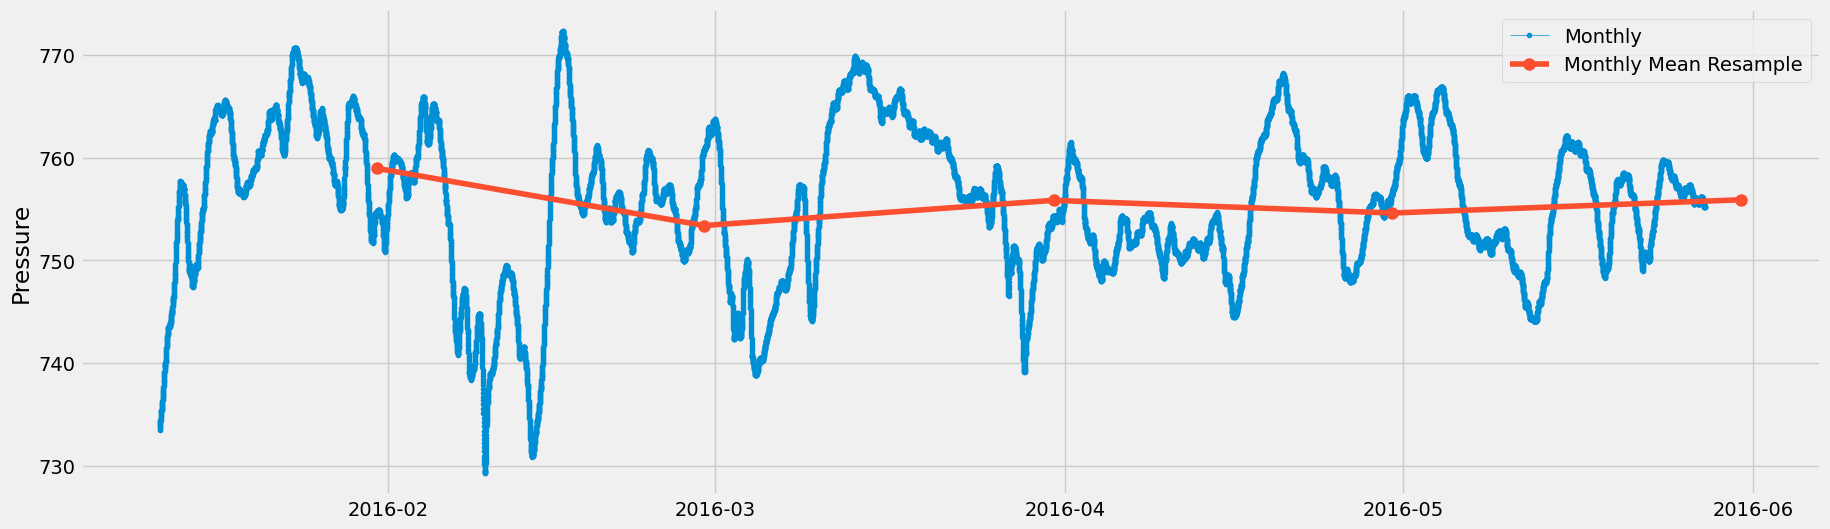

In [21]:
y = df['Press_mm_hg']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Pressure')
ax.legend();